**Simple Linear Regression - Scratch**

**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, mean_absolute_error, explained_variance_score

**Load Dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/Placement_Data.csv')
data.head(5)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [ ]:
x = data.iloc[:, :1].values
y = data.iloc[:, 1:].values

# Then create a dataset for training (80% : 20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 1), (40, 1), (160, 1), (40, 1))

**Train**

In [ ]:
class LinearRegressionGD:
  def __init__(self, regul=0):
      self.regul = regul
      self.W = None
      self.b = 0
      self.loss = []
      self.output = []

  def mse(self, y_true, y_pred):
      # Calculate Mean Squared Error
      squared_differences = (y_true - y_pred) ** 2
      return np.mean(squared_differences)

  def feed_forward(self, X):
      # Calculate the predictions based on current weights and bias
      return np.dot(X, self.W) + self.b

  def back_prop(self, X, y, y_pred):
      # Calculate gradients for weights and bias
      n = len(y)

      # Reshape y and y_pred to ensure proper broadcasting
      y = y.reshape(-1, 1)
      y_pred = y_pred.reshape(-1, 1)

      dw = (-2/n) * np.dot(X.T, (y - y_pred)) + 2 * self.regul * self.W.reshape(-1, 1)
      db = (-2/n) * np.sum(y - y_pred)

      # Flatten dw to ensure it matches the shape of W
      dw = dw.flatten()

      return dw, db

  def Gradient_descent(self, lr, dw, db):
      # Update weights and bias based on gradients
      self.W = self.W - lr * dw
      self.b = self.b - lr * db

  def fit(self, X, y, lr=0.01, num_iter=1000):
    # Input validation
    if len(X) != len(y) or len(X) == 0:
        raise ValueError("X and y must have the same length and cannot be empty")

    # Add bias term to X -> [1 X]
    X = np.hstack([np.ones((len(X), 1)), X])

    # Initialize W to zeros
    self.W = np.zeros(X.shape[1])
    self.b = 0  # Initialize bias to 0

    # Use gradient descent to minimize cost function
    for i in range(num_iter):
        # Calculate predicted values
        y_pred = self.feed_forward(X)

        # Calculate loss and store it
        cost = self.mse(y, y_pred)
        self.loss.append(cost)

        # Calculate gradients
        dw, db = self.back_prop(X, y, y_pred)

        # Update W and b using gradient descent
        self.Gradient_descent(lr, dw, db)

        # Store output at every 30th epoch
        if i % 30 == 0:
          self.output.append(self.feed_forward(X))

        # Scale down values for better readability
        scaled_cost = cost / 1e8  # Adjust scaling factor as needed
        scaled_intercept = self.b / 1000  # Adjust scaling factor as needed
        scaled_slope = self.W[1] / 100 if len(self.W) > 1 else self.W[0] / 100

        # Print details for each epoch
        intercept = self.b
        slope = self.W[1] if len(self.W) > 1 else self.W[0]
        print(f"Epoch {i+1}, Loss: {scaled_cost:06.2f}, Intercept: {scaled_intercept:06.2f}, Slope: {scaled_slope:06.2f}")

  def predict(self, X):
      # Add bias term to X
      X = np.hstack([np.ones((len(X), 1)), X])

      # Calculate predicted values
      y_pred = self.feed_forward(X)
      return y_pred

In [ ]:
# Initialize and fit the model
lr = LinearRegressionGD(regul=0.1)
lr.fit(x, y, lr=0.01, num_iter=1000)

Epoch 1, Loss: 000.00, Intercept: 000.00, Slope: 000.00
Epoch 2, Loss: 000.00, Intercept: 000.00, Slope: 000.00
Epoch 3, Loss: 000.00, Intercept: 000.00, Slope: 000.00
Epoch 4, Loss: 000.00, Intercept: 000.00, Slope: 000.00
Epoch 5, Loss: 000.00, Intercept: 000.00, Slope: 000.00
Epoch 6, Loss: 000.00, Intercept: 000.00, Slope: 000.00
Epoch 7, Loss: 000.00, Intercept: 000.00, Slope: 000.00
Epoch 8, Loss: 000.00, Intercept: 000.00, Slope: 000.00
Epoch 9, Loss: 000.00, Intercept: 000.00, Slope: 000.00
Epoch 10, Loss: 000.00, Intercept: 000.00, Slope: 000.00
Epoch 11, Loss: 000.00, Intercept: 000.00, Slope: 000.00
Epoch 12, Loss: 000.00, Intercept: 000.00, Slope: 000.00
Epoch 13, Loss: 000.00, Intercept: 000.00, Slope: 000.00
Epoch 14, Loss: 000.00, Intercept: 000.00, Slope: 000.00
Epoch 15, Loss: 000.00, Intercept: 000.00, Slope: 000.00
Epoch 16, Loss: 000.00, Intercept: 000.00, Slope: 000.00
Epoch 17, Loss: 000.00, Intercept: 000.00, Slope: 000.00
Epoch 18, Loss: 000.00, Intercept: 000.0

In [ ]:
# Print the slope and intercept
slope = lr.W[1]
intercept = lr.b
print("Slope (W):", slope)
print("Intercept (b):", intercept)

Slope (W): 0.4707717680895032
Intercept (b): -0.19535004544333118


**Prediction**

In [ ]:
# Prediction for whole test data
y_pred = lr.predict(x_test)
print(y_pred)

[3.75350747 3.08030384 2.4824237  2.6424861  1.86571268 1.96928247
 2.21879151 2.94378003 3.64522996 2.94848775 3.92298531 3.43338267
 2.97673405 2.49654685 3.16033504 3.39572093 2.110514   3.20741222
 2.98144177 3.35335147 2.62836294 3.14150417 2.8825797  3.10384243
 3.57932191 2.89199513 3.41925951 3.29215114 3.77704606 2.12463715
 3.55107561 3.17916591 3.62639909 2.82137937 2.81667165 3.23095081
 3.44750582 2.67544012 2.71310186 2.76017904]


In [ ]:
# Actual data (CGPA) and prediction (Package)
x_test[0], y_test[0]

(array([8.58]), array([4.1]))

In [ ]:
# Model Prediction (Package) for single data point
print(lr.predict(x_test[0].reshape(1, -1)))

[3.75350747]


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error : ", mse)
print("Mean Absolute Error : ", mae)
print("Explained Variance Score : ", evs)
print("R2 Score : ", r2)

Mean Squared Error :  0.1416968695999171
Mean Absolute Error :  0.31597615481472224
Explained Variance Score :  0.7469981219199304
R2 Score :  0.7438432770708598


**Visualization**

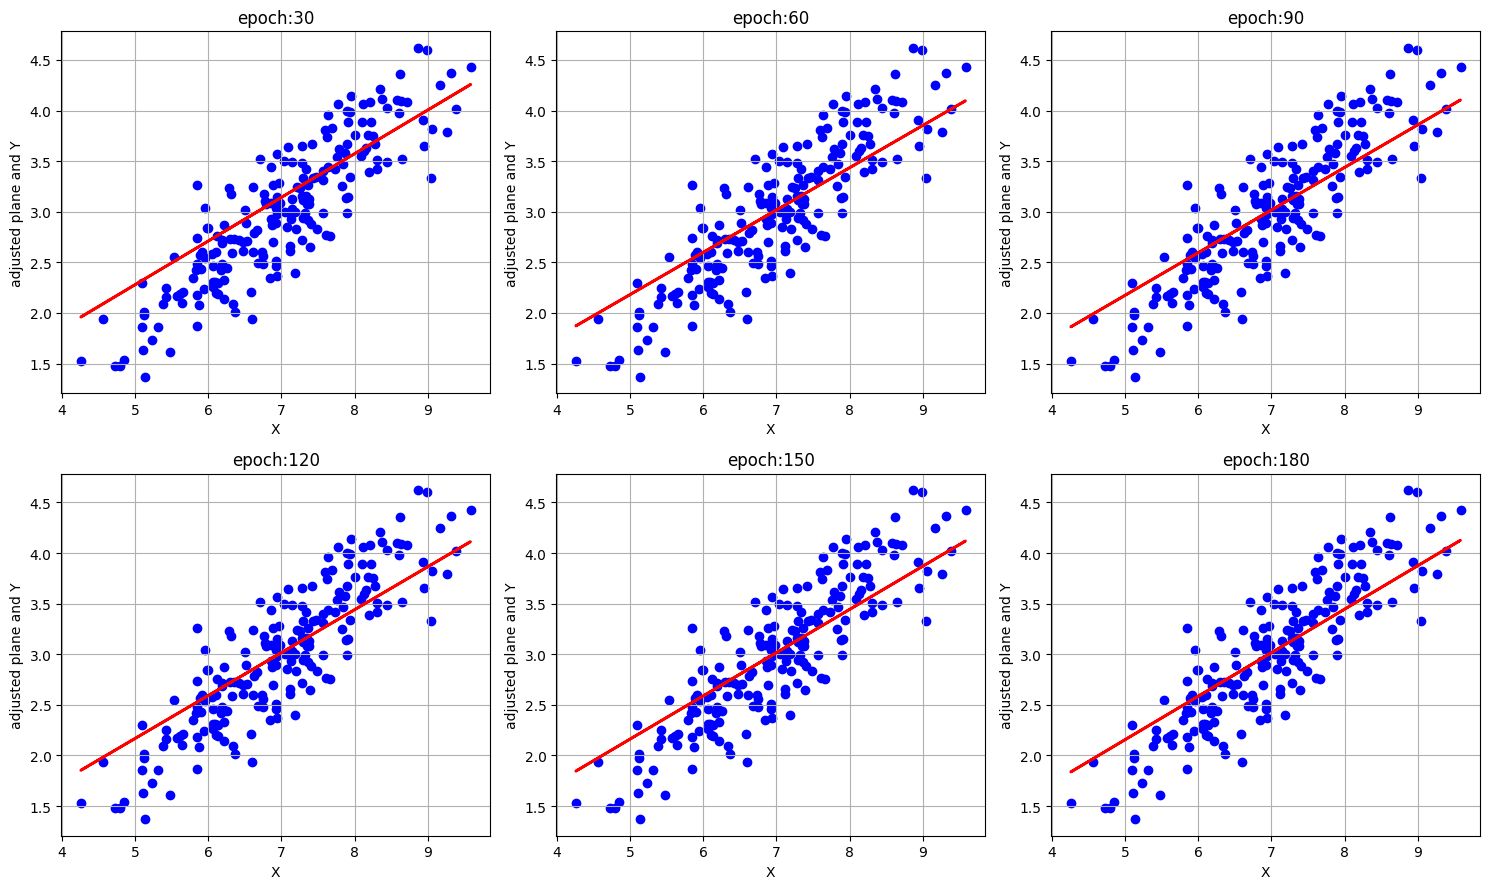

In [ ]:
# Plotting
fig, ax = plt.subplots(2, 3, figsize=(15, 9))
l=0
for row in range(2):
    for col in range(3):

        ax[row,col].scatter(x, y, color='blue')
        ax[row,col].plot(x, lr.output[l], color='red', lw=2)
        # chart formatting
        ax[row,col].set_title('epoch:'+str((l+1)*30))
        #ax.get_legend().remove()
        ax[row,col].set_ylabel("adjusted plane and Y")
        ax[row,col].set_xlabel("X")
        ax[row,col].grid()
        l+=1

plt.tight_layout()
plt.show()

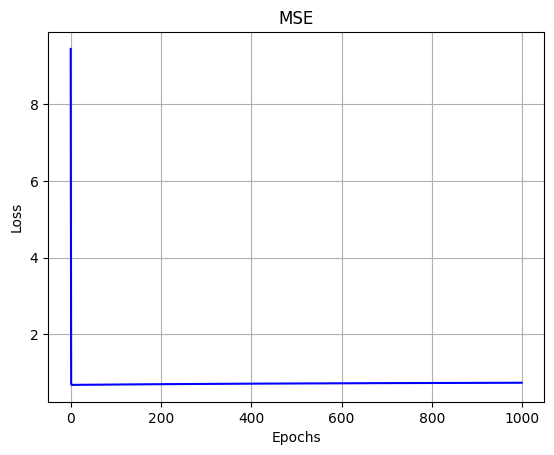

In [ ]:
plt.plot(lr.loss, 'blue')
plt.grid()
plt.title("MSE")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()